In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline

# Load Clean Data

In [2]:
df = pd.read_csv('Processed_data/full_clean_data.csv',index_col=0)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 663623 entries, 0 to 663622
Data columns (total 17 columns):
claim_id           663623 non-null float64
enrollee_id        663623 non-null float64
provider_id        663623 non-null float64
provider_status    663623 non-null float64
hmo_id             663623 non-null float64
care_id            663623 non-null float64
qty                663623 non-null float64
amount             663623 non-null float64
approved_qty       663623 non-null float64
approved_amount    663623 non-null float64
hmo_approved       663623 non-null float64
created_at         663623 non-null object
vetted_at          663623 non-null object
label              663623 non-null int64
unit_price         663623 non-null float64
id                 663615 non-null float64
diagnosis_id       663615 non-null float64
dtypes: float64(14), int64(1), object(2)
memory usage: 91.1+ MB


In [5]:
# convert time data to time seires
df['created_at'] = pd.to_datetime(df['created_at'])
df['vetted_at'] = pd.to_datetime(df['vetted_at'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 663623 entries, 0 to 663622
Data columns (total 17 columns):
claim_id           663623 non-null float64
enrollee_id        663623 non-null float64
provider_id        663623 non-null float64
provider_status    663623 non-null float64
hmo_id             663623 non-null float64
care_id            663623 non-null float64
qty                663623 non-null float64
amount             663623 non-null float64
approved_qty       663623 non-null float64
approved_amount    663623 non-null float64
hmo_approved       663623 non-null float64
created_at         663623 non-null datetime64[ns]
vetted_at          663623 non-null datetime64[ns]
label              663623 non-null int64
unit_price         663623 non-null float64
id                 663615 non-null float64
diagnosis_id       663615 non-null float64
dtypes: datetime64[ns](2), float64(14), int64(1)
memory usage: 91.1 MB


In [22]:
# check time data distribution
df['vetting_time'] = df['vetted_at'] - df['created_at']
df['vetting_time'].mean(),df['vetting_time'].min(),df['vetting_time'].max()

(Timedelta('40 days 17:02:33.730811'),
 Timedelta('0 days 00:01:03'),
 Timedelta('445 days 22:48:14'))

/Users/shunling/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


Text(0, 0.5, 'cumulative frequence')

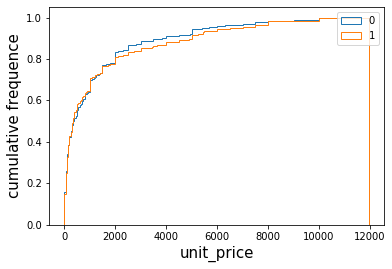

In [72]:
# plot distribution difference between two groups in cumulative normalized distribution format
df.loc[df['label']==0]['unit_price'].plot.hist(bins=range(0,12000,50),histtype='step',label='0',normed=True,cumulative=True)
df.loc[df['label']==1]['unit_price'].plot.hist(bins=range(0,12000,50),histtype='step',label='1',normed=True,cumulative=True)
plt.legend(loc=1)
plt.xlabel('unit_price',size=15)
plt.ylabel('cumulative frequence',size=15)

/Users/shunling/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


Text(0, 0.5, 'cumulative frequence')

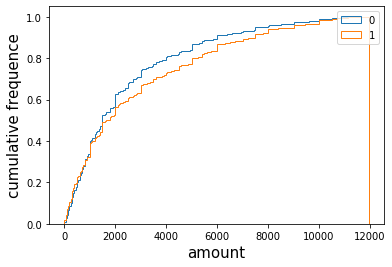

In [67]:
df.loc[df['label']==0]['amount'].dropna().plot.hist(bins=range(0,12000,50),histtype='step',label='0',normed=True,cumulative=True)
df.loc[df['label']==1]['amount'].dropna().plot.hist(bins=range(0,12000,50),histtype='step',label='1',normed=True,cumulative=True)
plt.legend(loc=1)
plt.xlabel('amount',size=15)
plt.ylabel('cumulative frequence',size=15)

/Users/shunling/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


Text(0, 0.5, 'cumulative frequence')

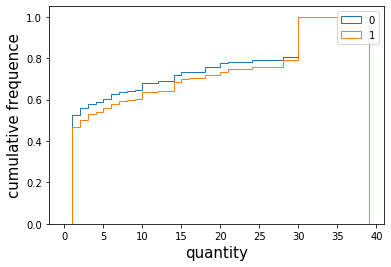

In [68]:
df.loc[df['label']==0]['qty'].dropna().plot.hist(bins=range(0,40,1),histtype='step',label='0',normed=True,cumulative=True)
df.loc[df['label']==1]['qty'].dropna().plot.hist(bins=range(0,40,1),histtype='step',label='1',normed=True,cumulative=True)
plt.legend(loc=1)
plt.xlabel('quantity',size=15)
plt.ylabel('cumulative frequence',size=15)

/Users/shunling/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


Text(0, 0.5, 'frequence')

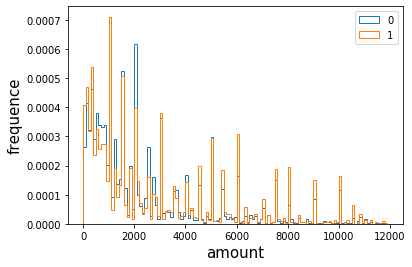

In [69]:
# check distribution difference in histogram
df.loc[df['label']==0]['amount'].dropna().plot.hist(bins=range(0,12000,100),histtype='step',label='0',normed=True)
df.loc[df['label']==1]['amount'].dropna().plot.hist(bins=range(0,12000,100),histtype='step',label='1',normed=True)
plt.legend(loc=1)
plt.xlabel('amount',size=15)
plt.ylabel('frequence',size=15)

/Users/shunling/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


Text(0, 0.5, 'frequence')

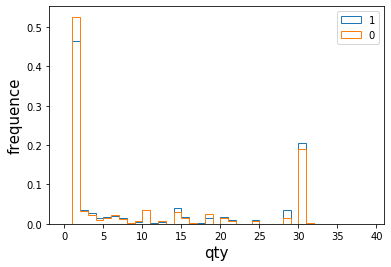

In [72]:
df.loc[df['label']==1]['qty'].dropna().plot.hist(bins=range(0,40,1),histtype='step',label='1',normed=True)
df.loc[df['label']==0]['qty'].dropna().plot.hist(bins=range(0,40,1),histtype='step',label='0',normed=True)
plt.legend(loc=1)
plt.xlabel('qty',size=15)
plt.ylabel('frequence',size=15)

## using baysian inference to get optimized parameter of claim anout distribution

In [24]:

from scipy.stats import expon,gamma
from numpy.random import seed
import pymc3 as pm

In [5]:
# observation (obs)
obs = df.dropna().loc[df.amount>0]['amount']
obs.min(),obs.max()

(0.1, 2850000.0)

In [4]:
# initial parameter of gamma distribution
alpha_est = np.mean(df.amount)**2 / np.var(df.amount)
beta_est = np.var(df.amount) / np.mean(df.amount)
rate_est = 1/beta_est
alpha_est,beta_est,rate_est

(0.052474744023711335, 79225.87060322592, 1.2622139616592386e-05)

In [27]:

# baysian optimization of parameter
with pm.Model() as model:
    
    alpha_ = pm.Exponential('alpha', alpha_est)
    rate_ = pm.Exponential('rate',rate_est)
    
    y_obs = pm.Gamma('y_obs', alpha=alpha_, beta=1/rate_, observed=obs)
    trace = pm.sample(tune = 2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [rate, alpha]
Sampling 2 chains: 100%|██████████| 5000/5000 [01:11<00:00, 69.77draws/s]


In [28]:
# check parameter simulation reults
alpha = np.mean(trace['alpha'])
rate = np.mean(trace['rate'])


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c300d98d0>,
      dtype=object)

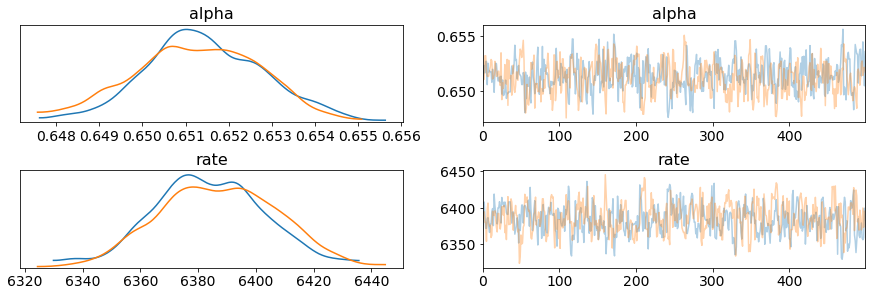

In [29]:
# check trace: it looks like two peaks appeared, which is not a good sign for converging, should notice the issuse
pm.traceplot(trace)


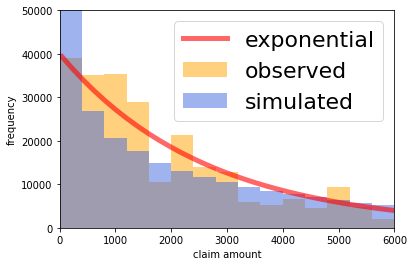

In [74]:

# exponential simulation
# plot the distribution curve
skew=1.6
lam = 1/np.mean(df.amount)
yscale = 40000
x  = 1/lam*np.linspace(expon.ppf(0.01), expon.ppf(0.99), 100)
y = yscale*expon.pdf(x*lam*skew)
plt.plot(x, y,'r-', lw=5, alpha=0.6, label='exponential')

#best_shot_simulated = expon(scale=1/(lam*skew)).rvs(df.amount.shape[0])

# gamma simulation
seed(47)
simulated = gamma(alpha,scale=rate).rvs(df.amount.shape[0])
# plot distribution histogram

df.amount.dropna().plot.hist(bins=range(0,20000,400),label='observed',alpha=0.5,color='orange')
plt.hist(simulated,bins=range(0,20000,400),label='simulated',alpha=0.5,color='royalblue')
plt.xlabel('claim amount',size=10)
plt.ylabel('frequency',size=10)
plt.xlim(0,6000)
plt.ylim(0,50000)
plt.legend(fontsize = 22)

In [63]:
# use normal distribution as prior guess of distribution
with pm.Model() as model:
    lam_ = pm.Normal('mu', mu = 1/df.amount.mean())
    y_obs = pm.Exponential('y_obs', lam = lam_, observed=obs)
    trace = pm.sample(tune = 2000)

/Users/shunling/opt/anaconda3/lib/python3.7/site-packages/pymc3/distributions/continuous.py:88: UserWarning: The variable specified for lam has negative support for Exponential, likely making it unsuitable for this parameter.
  warnings.warn(msg)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [mu]
Sampling 2 chains: 100%|██████████| 5000/5000 [00:41<00:00, 120.86draws/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c49364490>,
      dtype=object)

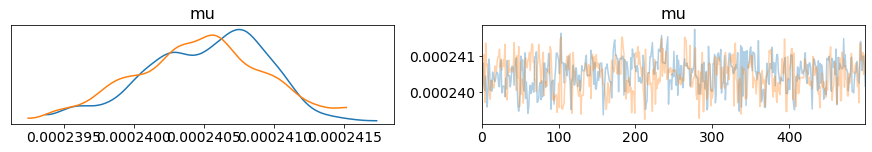

In [64]:
# trace indicates the converge is not good as well.
pm.traceplot(trace)


In [67]:
lam = np.mean(trace['mu'])

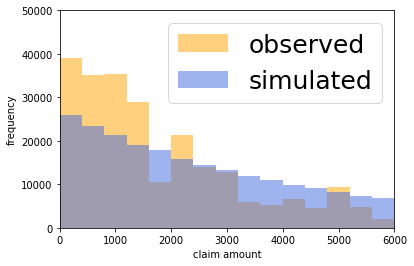

In [71]:
# gamma simulation
seed(47)
exp_simulated = expon(scale=1/lam).rvs(df.amount.shape[0])
# plot distribution histogram

df.amount.dropna().plot.hist(bins=range(0,20000,400),label='observed',alpha=0.5,color='orange')
plt.hist(exp_simulated,bins=range(0,20000,400),label='simulated',alpha=0.5,color='royalblue')
plt.xlabel('claim amount',size=10)
plt.ylabel('frequency',size=10)
plt.xlim(0,6000)
plt.ylim(0,50000)
plt.legend(fontsize = 25)

### Conclusion: use exponential prior distribution is better than use normal distribution as prior

# EDA to check distribution and correlation of data

In [4]:
df.head()

,claim_id,enrollee_id,provider_id,provider_status,hmo_id,care_id,qty,amount,approved_qty,approved_amount,hmo_approved,created_at,vetted_at,label,unit_price
0,10.0,89.0,1.0,1.0,1.0,586.0,6.0,1816.08,6.0,1816.08,1.0,2018-03-12 14:53:46,2018-05-21 10:05:30,0,302.68
1,11.0,89.0,1.0,1.0,1.0,586.0,6.0,1816.08,6.0,1816.08,1.0,2018-03-13 14:50:39,2018-05-21 10:07:19,0,302.68
2,13.0,74.0,1.0,1.0,1.0,434.0,5.0,115.00,5.0,115.00,1.0,2018-03-16 10:28:53,2018-05-21 10:09:30,0,23.00
3,13.0,74.0,1.0,1.0,1.0,1102.0,10.0,1265.00,10.0,1265.00,1.0,2018-03-16 10:28:53,2018-05-21 10:09:30,0,126.50
4,13.0,74.0,1.0,1.0,1.0,299.0,15.0,138.00,15.0,138.00,1.0,2018-03-16 10:28:53,2018-05-21 10:09:30,0,9.20


## check feature correlation pattern

Text(0, 0.5, 'provider_id')

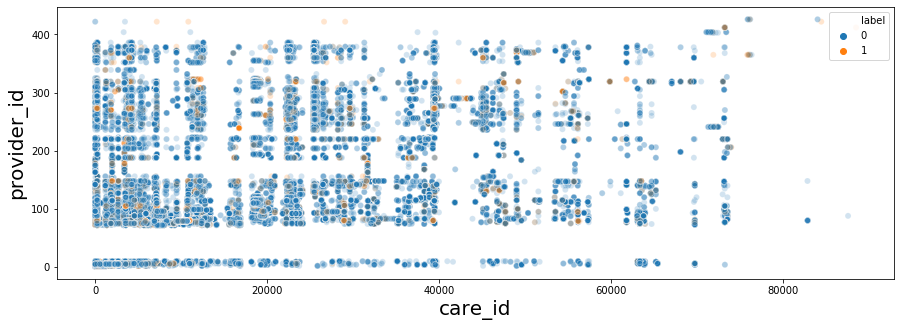

In [18]:
fig, ax = plt.subplots(figsize=(15,5))
sns.scatterplot(x='care_id',y='provider_id',hue = 'label', data=df, alpha=0.2, ax=ax)
plt.legend(loc=1)
plt.xlabel('care_id',size=20)
plt.ylabel('provider_id',size=20)
#plt.close(2)

Text(0, 0.5, 'diagnosis_id')

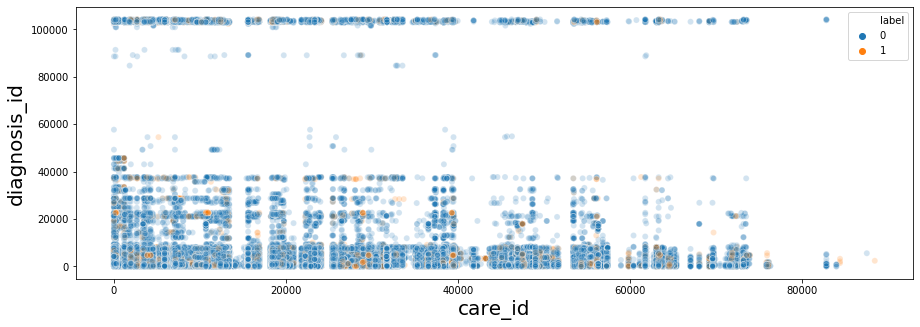

In [15]:
fig, ax = plt.subplots(figsize=(15,5))
sns.scatterplot(x='care_id',y='diagnosis_id',hue = 'label', data=df, alpha=0.2, ax=ax)
plt.legend(loc=1)
plt.xlabel('care_id',size=20)
plt.ylabel('diagnosis_id',size=20)


Text(0, 0.5, 'enrollee_id')

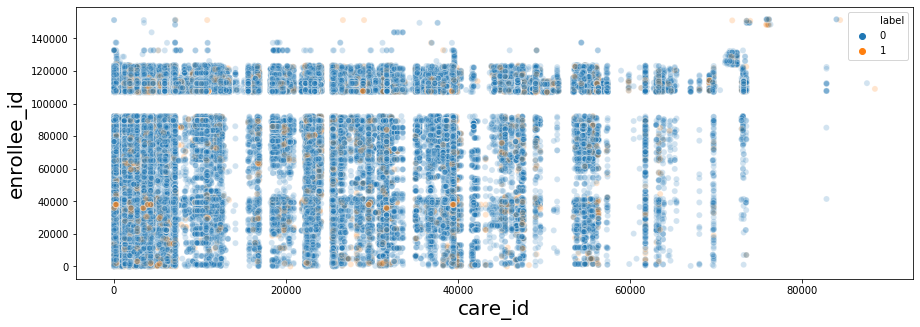

In [19]:
fig, ax = plt.subplots(figsize=(15,5))
sns.scatterplot(x='care_id',y='enrollee_id',hue = 'label', data=df, ax=ax,alpha=0.2)
plt.legend(loc=1)
plt.xlabel('care_id',size=20)
plt.ylabel('enrollee_id',size=20)

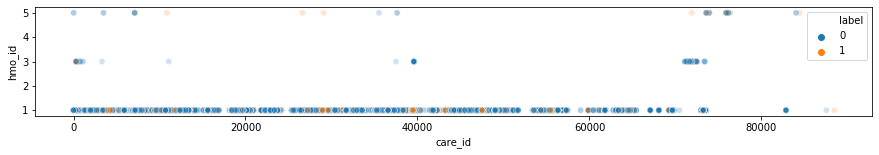

In [12]:
fig, ax = plt.subplots(figsize=(15,2))
sns.scatterplot(x='care_id',y='hmo_id',hue = 'label', alpha=0.2, data=df, ax=ax)
plt.legend(loc=1)

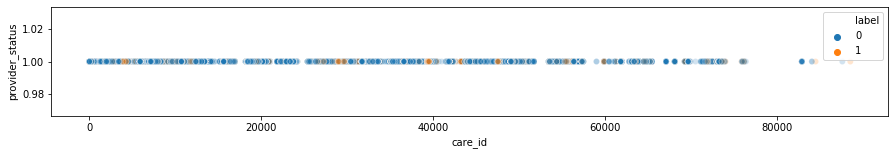

In [13]:
fig, ax = plt.subplots(figsize=(15,2))
sns.scatterplot(x='care_id',y='provider_status',hue = 'label', alpha=0.2, data=df, ax=ax)

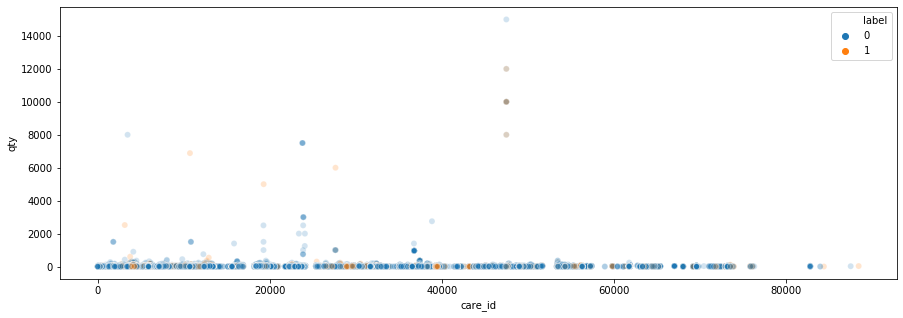

In [15]:
fig, ax = plt.subplots(figsize=(15,5))
sns.scatterplot(x='care_id',y='qty',hue = 'label', alpha=0.2, data=df, ax=ax)
plt.xlabel('care_id',size=20)
plt.ylabel('qty',size=20)

Text(0, 0.5, 'amount')

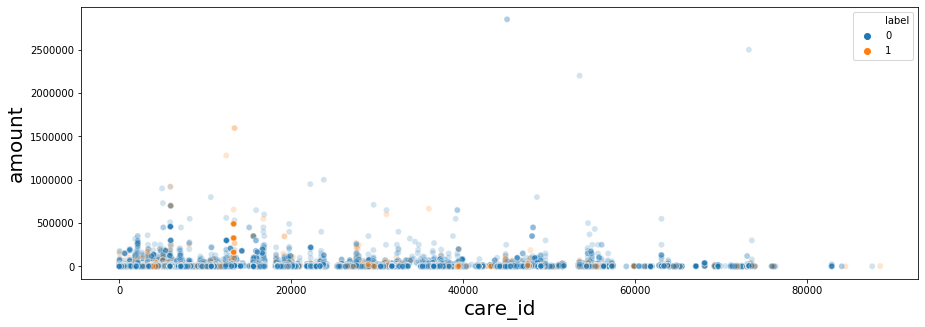

In [21]:
fig, ax = plt.subplots(figsize=(15,5))
sns.scatterplot(x='care_id',y='amount',hue = 'label', alpha=0.2, data=df, ax=ax)
plt.xlabel('care_id',size=20)
plt.ylabel('amount',size=20)

## Conclusion: care_id, diagnosis_id, enrollee_id and amount all showed unique pattern, but not hmo_id or provider_status

## EDA to check distribution

In [3]:
from collections import Counter

/Users/shunling/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/shunling/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


Text(0, 0.5, 'cumulative frequence')

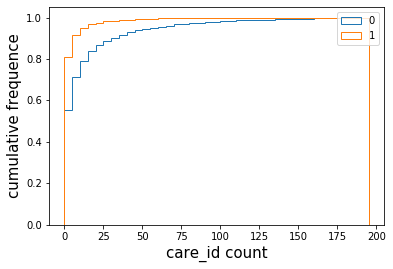

In [26]:
a = Counter(df.loc[df.label == 0]['care_id']).values()
b = Counter(df.loc[df.label == 1]['care_id']).values()
plt.hist(a,bins=range(0,200,5),histtype='step',label='0',normed=True,cumulative=True)
plt.hist(b,bins=range(0,200,5),histtype='step',label='1',normed=True,cumulative=True)

plt.legend(loc=1)
plt.xlabel('care_id count',size=15)
plt.ylabel('cumulative frequence',size=15)

/Users/shunling/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/shunling/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


Text(0, 0.5, 'cumulative frequence')

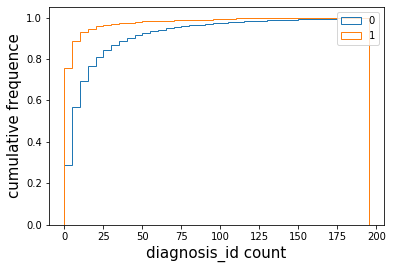

In [4]:
a = Counter(df.loc[df.label == 0]['diagnosis_id']).values()
b = Counter(df.loc[df.label == 1]['diagnosis_id']).values()
plt.hist(a,bins=range(0,200,5),histtype='step',label='0',normed=True,cumulative=True)
plt.hist(b,bins=range(0,200,5),histtype='step',label='1',normed=True,cumulative=True)

plt.legend(loc=1)
plt.xlabel('diagnosis_id count',size=15)
plt.ylabel('cumulative frequence',size=15)

/Users/shunling/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/shunling/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


Text(0, 0.5, 'cumulative frequence')

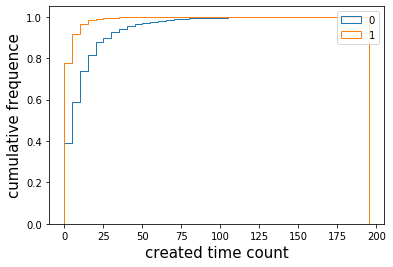

In [7]:
a = Counter(df.loc[df.label == 0]['created_at']).values()
b = Counter(df.loc[df.label == 1]['created_at']).values()
plt.hist(a,bins=range(0,200,5),histtype='step',label='0',normed=True,cumulative=True)
plt.hist(b,bins=range(0,200,5),histtype='step',label='1',normed=True,cumulative=True)

plt.legend(loc=1)
plt.xlabel('created time count',size=15)
plt.ylabel('cumulative frequence',size=15)

/Users/shunling/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/shunling/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


Text(0, 0.5, 'cumulative frequence')

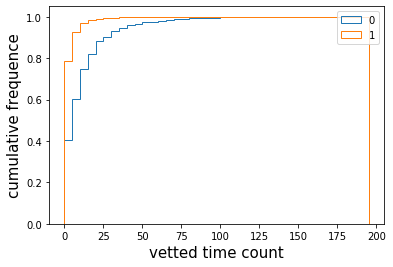

In [8]:
a = Counter(df.loc[df.label == 0]['vetted_at']).values()
b = Counter(df.loc[df.label == 1]['vetted_at']).values()
plt.hist(a,bins=range(0,200,5),histtype='step',label='0',normed=True,cumulative=True)
plt.hist(b,bins=range(0,200,5),histtype='step',label='1',normed=True,cumulative=True)

plt.legend(loc=1)
plt.xlabel('vetted time count',size=15)
plt.ylabel('cumulative frequence',size=15)

/Users/shunling/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/shunling/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


Text(0, 0.5, 'cumulative frequence')

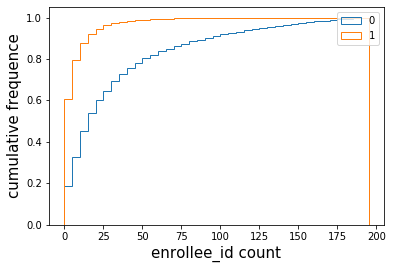

In [14]:
a = Counter(df.loc[df.label == 0]['enrollee_id']).values()
b = Counter(df.loc[df.label == 1]['enrollee_id']).values()
plt.hist(a,bins=range(0,200,5),histtype='step',label='0',normed=True,cumulative=True)
plt.hist(b,bins=range(0,200,5),histtype='step',label='1',normed=True,cumulative=True)

plt.legend(loc=1)
plt.xlabel('enrollee_id count',size=15)
plt.ylabel('cumulative frequence',size=15)

/Users/shunling/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/shunling/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


Text(0, 0.5, 'cumulative frequence')

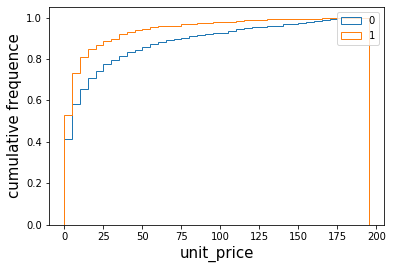

In [73]:
a = Counter(df.loc[df.label == 0]['unit_price']).values()
b = Counter(df.loc[df.label == 1]['unit_price']).values()
plt.hist(a,bins=range(0,200,5),histtype='step',label='0',normed=True,cumulative=True)
plt.hist(b,bins=range(0,200,5),histtype='step',label='1',normed=True,cumulative=True)

plt.legend(loc=1)
plt.xlabel('unit_price',size=15)
plt.ylabel('cumulative frequence',size=15)

In [69]:
# Time series plot of correlation
def plot_timeseries(df,col,color,label):
    

    df[col].resample('1m').mean().plot(figsize=(20,7),linewidth=10,fontsize=20,color=color,label=label)


    plt.legend(loc='upper right')

    plt.ylabel('Average '+col,fontsize=25)
    
    plt.xlabel('Time Series',fontsize=45)
    plt.xticks(rotation=45)
    plt.show()

## EDA to check time series distibution

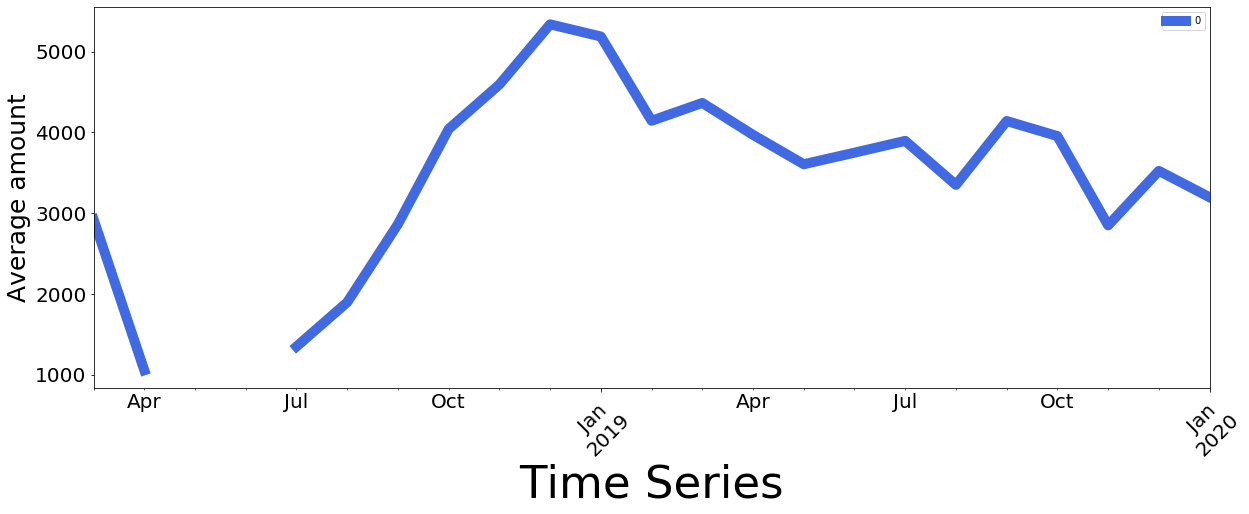

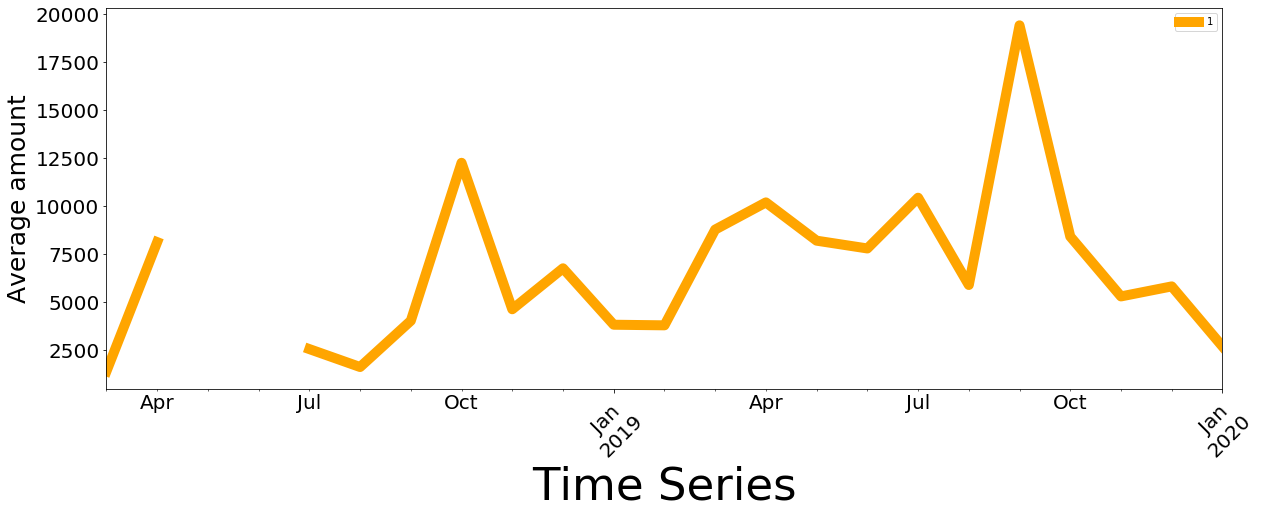

In [70]:
# Time series plot of claim_id
fig = plt.figure(figsize=(15,5))
plot_timeseries(df.loc[df.label==0][['created_at','amount']].set_index('created_at'),'amount','royalblue','0')
plot_timeseries(df.loc[df.label==1][['created_at','amount']].set_index('created_at'),'amount','orange','1')

## further verify data value

In [58]:
df.loc[df.label==0].claim_id.unique().shape[0],df.loc[df.label==1].claim_id.unique().shape[0]

(51247, 7588)

In [66]:
df.claim_id.unique().shape[0],df.hmo_id.unique().shape[0]

(51883, 3)

In [65]:
df.enrollee_id.unique().shape[0],df.diagnosis_id.unique().shape[0],df.care_id.unique().shape[0]

(11270, 8901, 12714)